### Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import sklearn.naive_bayes as naive_bayes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.svm as svm 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import re 

In [41]:
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading Data

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
train_data = pd.read_csv("/content/drive/MyDrive/AskReddit-Dataset/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/AskReddit-Dataset/test.csv")

### EDA

In [44]:
train_data.head()

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653061 entries, 0 to 653060
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            653061 non-null  object
 1   question_text  653061 non-null  object
 2   target         653061 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 14.9+ MB


In [46]:
train_data.shape

(653061, 3)

In [47]:
test_data.shape

(653061, 2)

In [48]:
train_data.isna().sum() 

qid              0
question_text    0
target           0
dtype: int64

In [49]:
(train_data == "?").sum() 

qid              0
question_text    0
target           0
dtype: int64

In [50]:
train_data.duplicated().sum()

0

In [51]:
train_data['target'].value_counts()

0    612656
1     40405
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


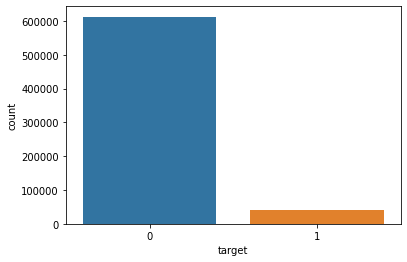

In [52]:
sns.countplot(train_data['target']) 

In [53]:
test_data.isna().sum()

qid              0
question_text    0
dtype: int64

In [54]:
(test_data == "?").sum() 

qid              0
question_text    0
dtype: int64

In [55]:
test_data.duplicated().sum()

0

In [56]:
main_data = train_data.append(test_data) 

## PreProcessing

In [57]:
def remove_punctuation(text):
  punctuationfree="".join([i for i in text if i not in string.punctuation]) 
  return punctuationfree 
def tokenization(text):
  tokens = re.split('\W+',text) 
  return tokens 
def remove_stopwords(text): 
  stopwords1 = nltk.corpus.stopwords.words('english') 
  output= [i for i in text if i not in stopwords1] 
  return output 
def lemmatizer(text): 
  wordnet_lemmatizer  = nltk.WordNetLemmatizer() 
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text] 
  return lemm_text 
def stemming(text): 
  porter_stemmer = nltk.PorterStemmer() 
  stem_text = [porter_stemmer.stem(word) for word in text] 
  return stem_text 

In [58]:
# main_data['question_text'] = main_data['question_text'].apply(lambda x: x.lower()) 
# main_data['question_text'] = main_data['question_text'].apply(lambda x: remove_punctuation(x)) 
# main_data['question_text'] = main_data['question_text'].apply(lambda x: tokenization(x)) 
# main_data['question_text'] = main_data['question_text'].apply(lambda x: remove_stopwords(x)) 
# main_data['question_text'] = main_data['question_text'].apply(lambda x: lemmatizer(x)) 
# main_data['question_text'] = main_data['question_text'].apply(lambda x: stemming(x)) 
# main_data['question_text'] = main_data['question_text'].str.join(" ") 

In [59]:
count_vectorizer = CountVectorizer(ngram_range=(1,4)) 
final_data = count_vectorizer.fit_transform(main_data['question_text'])
# tfidf_vectorizer = TfidfVectorizer() 
# final_data = tfidf_vectorizer.fit_transform(final_data)

In [60]:
# final_data = final_data.todense()

In [61]:
final_data.shape 

(1306122, 20650674)

In [62]:
questions = final_data[:653061,:]
final_test_data  = final_data[653061:,:] 

In [63]:
# type(final_train_data)

In [64]:
# final_train_data.shape

In [65]:
targets = train_data['target'].to_numpy()

In [66]:
type(targets)

numpy.ndarray

In [67]:
# Stratified train test split 
train_X, test_X, train_y, test_y = train_test_split(questions, targets, test_size=0.2, random_state=40, stratify=targets) 

In [68]:
# svd = TruncatedSVD(n_components=450)
# train_X = svd.fit_transform(train_X)
# test_X = svd.transform(test_X) 

In [69]:
# pca = PCA(n_components=300)
# train_X = pca.fit_transform(train_X)
# test_X = pca.transform(test_X)

In [70]:
# parameters = {'solver':['liblinear', 'sag', 'saga'], 'C':[0,0.3]}
# lr = LogisticRegression()
# gscv = GridSearchCV(lr, parameters)
# gscv.fit(questions, targets)
# gscv.best_params_ 

In [71]:
# train = train_X.toarray()

##  Model Fitting

In [72]:
# model = BaggingClassifier(base_estimator=SVC(),n_estimators=1000, random_state=0, max_samples = 30)

In [73]:
# model = GaussianNB()

In [74]:
# model = SVC(kernel = 'rbf',class_weight = "balanced",C = 0.5, probability = True) 

In [75]:
# model = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1)

In [76]:
# model = DecisionTreeClassifier(class_weight = "balanced" ,random_state=0) 

In [77]:
model = LogisticRegression(C=0.77, class_weight= {0:0.25,1:1}, solver = 'liblinear', max_iter=10000, penalty = 'l1')

In [78]:
model.fit(train_X, train_y) 

LogisticRegression(C=0.77, class_weight={0: 0.25, 1: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [79]:
train_yhat = model.predict(train_X)
test_yhat = model.predict(test_X) 

In [80]:
metrics.f1_score(train_y, train_yhat)

0.700112553874873

In [81]:
metrics.f1_score(test_y, test_yhat)

0.6307546008838172

In [82]:
# metrics.confusion_matrix(test_y,test_yhat)

##  Final fit

In [ ]:
model.fit(questions, train_data['target'])

In [ ]:
yhat = model.predict(final_test_data)
test_data["target"] = yhat 
to_submit = test_data[["qid", "target"]]
to_submit.to_csv("project_submission.csv", index=False) 
files.download(f'project_submission.csv')

In [ ]:
np.unique(yhat,return_counts=True)